In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/cars24-car-price.csv')

In [5]:
df.make.value_counts()

make
MARUTI           5650
HYUNDAI          3562
HONDA            1779
MAHINDRA         1276
TOYOTA           1189
TATA              971
FORD              900
VOLKSWAGEN        761
RENAULT           636
MERCEDES-BENZ     485
BMW               483
SKODA             422
CHEVROLET         406
AUDI              324
NISSAN            289
DATSUN            170
FIAT              113
JAGUAR             80
LAND               51
VOLVO              42
JEEP               41
MITSUBISHI         39
KIA                33
PORSCHE            25
MINI               23
MG                 19
ISUZU              12
LEXUS              10
FORCE               5
AMBASSADOR          4
BENTLEY             4
OPELCORSA           3
DAEWOO              2
MASERATI            2
PREMIER             2
DC                  2
LAMBORGHINI         1
FERRARI             1
MERCEDES-AMG        1
ROLLS-ROYCE         1
OPEL                1
Name: count, dtype: int64

In [3]:
# We don't need to do unnecessary encoding of 'make' and 'model' columns as they have too many unique values. So we will drop these columns.
df.drop(['make', 'model'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   Individual        19820 non-null  int64  
 8   Trustmark Dealer  19820 non-null  int64  
 9   Diesel            19820 non-null  int64  
 10  Electric          19820 non-null  int64  
 11  LPG               19820 non-null  int64  
 12  Petrol            19820 non-null  int64  
 13  Manual            19820 non-null  int64  
 14  5                 19820 non-null  int64  
 15  >5                19820 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2

In [7]:
X = df[df.columns.drop('selling_price')]
Y = df['selling_price']

In [33]:
X = X.to_numpy()
Y = Y.to_numpy()

In [34]:
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [35]:
# Here we take care of the case where theta0 (intercept) is not multiplied by any feature. So we add a column of ones to X.
# This column of ones will be multiplied by theta0 in the hypothesis function.
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [36]:
print(X.shape, Y.shape)

(19820, 16) (19820,)


In [ ]:
# Hypothesis function
# This function calculates the predicted value y_ for a given input feature vector X and parameter vector theta.
# But this function very inefficient for large datasets as it uses a loop. We will later vectorize this function.
def hypothesis(X, theta):
    y_ = 0.0
    n = X.shape[0]
    for i in range(n):
        y_ += theta[i] * X[i]
    return y_

In [15]:
# Error function
def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (Y[i] - y_) ** 2
    return total_error / (m)

In [16]:
# Gradient function
def gradient(X, Y, theta):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i], theta)
            grad[j] += (y_ - Y[i]) * X[i][j]
    return grad/m

In [17]:
def gradient_descent(X, Y, learning_rate=0.01, max_epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    error_list = []
    
    for epoch in range(max_epochs):
        e = error(X, Y, theta)
        error_list.append(e)
        # Compute the gradient
        grad = gradient(X, Y, theta)
        for j in range(n):
            theta[j] -= learning_rate * grad[j]
    return theta, error_list

In [ ]:
import time
start = time.time()
theta, error_list = gradient_descent(X, Y)
end = time.time()
print("Time taken:", end - start)

In [19]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [23]:
def error(X, Y, theta):
    e = 0.0
    m = X.shape[0]
    Y_ = hypothesis(X, theta)
    e = np.sum((Y - Y_) ** 2) / m
    return e

In [24]:
def gradient(X, Y, theta):
    Y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (Y_ - Y)) / X.shape[0]
    return grad

In [30]:
def gradient_descent(X, Y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros((n,))
    error_list = []

    for it in range(iterations):
        y_pred = np.array([hypothesis(X[i], theta) for i in range(m)])
        error_value = error(X, Y, theta)
        error_list.append(error_value)

        for j in range(n):
            gradient = (-2/m) * np.sum((Y - y_pred) * X[:, j])
            theta[j] -= learning_rate * gradient
    return theta, error_list

In [37]:
import time
start = time.time()
theta, error_list = gradient_descent(X, Y)
print("Theta:", theta)
end = time.time()
print("Time taken:", end - start)

Theta: [ 5.71214132e+00  8.48957998e-01 -2.72489606e-01 -4.78069177e-01
  9.71088496e-01  1.61535286e+00 -8.48957998e-01 -2.66591859e-01
 -3.96678387e-02  4.21696805e-01  1.27802941e-01  4.52782201e-03
 -4.04318514e-01 -1.15410537e+00 -5.86729724e-03 -5.52664408e-02]
Time taken: 2.7777836322784424


* Now we build the linear regression model using the Sciket learn and Stats module 

In [4]:
from sklearn.linear_model import LinearRegression


In [5]:
X = df[df.columns.drop('selling_price')]
Y = df['selling_price']

In [6]:
from sklearn.preprocessing import StandardScaler, minmax_scale
sc = StandardScaler()

In [7]:
cols = X.columns
X[cols] = sc.fit_transform(X[cols])
# X = sc.fit_transform(X) this will result in a numpy array and we will lose the column names

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_8228\72446618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = sc.fit_transform(X[cols])


In [8]:
X.head()

,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [9]:
model = LinearRegression()

In [10]:
model.fit(X, Y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
model.coef_

array([ 0.86201201, -0.22485635, -0.65203368,  0.41188575,  2.13600464,
       -0.86201201, -0.20068777, -0.04029826,  0.29827747,  0.18826292,
        0.00252284, -0.66389727, -1.04412823, -0.16611573, -0.20164504])

In [12]:
model.intercept_

np.float64(6.585508533804237)

In [13]:
model.score(X, Y)

0.7778268295343023

In [14]:
print("Adjusted R^2 :", 1 - (1-model.score(X, Y)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))

Adjusted R^2 : 0.7776585505221337


* statas model implementation

In [15]:
# !pip install statsmodels

In [16]:
import statsmodels.api as sm

In [17]:
X_sm = sm.add_constant(X) # Statasmodels default is without intercept, so we need to add a column of ones to X
sm_model = sm.OLS(Y, X_sm).fit()

In [18]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     4622.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:20:59   Log-Likelihood:                -44500.
No. Observations:               19820   AIC:                         8.903e+04
Df Residuals:                   19804   BIC:                         8.916e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5855      0.016  

In [19]:
# VIF (Varience inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [21]:
vif = pd.DataFrame()
X_t = X
vif["Features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif = round(vif, 2)
vif.sort_values(by="VIF", ascending=False)
vif

C:\Users\sangram.samanta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
1,km_driven,1.23
2,mileage,3.10
3,engine,6.25
4,max_power,4.02
5,age,inf
6,Individual,1.09
7,Trustmark Dealer,1.02
8,Diesel,16.99
9,Electric,1.17


In [22]:
X.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'Individual', 'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Petrol',
       'Manual', '5', '>5'],
      dtype='object')

In [23]:
cols2 = ['km_driven', 'mileage', 'engine', 'max_power','Individual', 'Trustmark Dealer','Electric', 'LPG', 'Manual']


In [24]:
X2 = X[cols2]

X2_SM = sm.add_constant(X2)

sm_model = sm.OLS(Y, X2_SM).fit()

In [25]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     4370.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:35:51   Log-Likelihood:                -48568.
No. Observations:               19820   AIC:                         9.716e+04
Df Residuals:                   19810   BIC:                         9.724e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5855      0.020  

In [27]:
cols3 = ['km_driven', 'mileage', 'engine', 'max_power','Individual' ,'Electric', 'Manual']


In [28]:
X3 = X[cols3]

X3_SM = sm.add_constant(X3)

sm_model = sm.OLS(Y, X3_SM).fit()

In [29]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     5619.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:37:55   Log-Likelihood:                -48569.
No. Observations:               19820   AIC:                         9.715e+04
Df Residuals:                   19812   BIC:                         9.722e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5855      0.020    330.416      0.0

In [30]:
vif = pd.DataFrame()
X_t = X3
vif["Features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif = round(vif, 2)
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,km_driven,1.09
1,mileage,1.67
2,engine,3.47
3,max_power,3.44
4,Individual,1.07
5,Electric,1.09
6,Manual,1.48


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.1, random_state=1)

In [32]:
print("Training X shape:", X_train.shape)
print("Testing X shape:", X_test.shape)
print("Training Y shape:", Y_train.shape)
print("Testing Y shape:", Y_test.shape)

Training X shape: (17838, 7)
Testing X shape: (1982, 7)
Training Y shape: (17838,)
Testing Y shape: (1982,)


In [33]:
final_model = LinearRegression()
final_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
final_model.coef_

array([-0.56225618,  0.64785176,  1.37293008,  2.29404683, -0.10930271,
       -0.09486204, -1.15079556])

In [35]:
final_model.intercept_

np.float64(6.580904020592826)

In [36]:
Y_pred = final_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [42]:
print("mean_absolute_error:", mean_absolute_error(Y_pred, Y_test))
print("mean_squared_error:", mean_squared_error(Y_pred, Y_test))
print("mean_absolute_percentage_error:", mean_absolute_percentage_error(Y_pred, Y_test))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(Y_pred, Y_test)))

mean_absolute_error: 1.955185898352651
mean_squared_error: 7.606463370303971
mean_absolute_percentage_error: 0.4982011512684131
root_mean_squared_error: 2.7579817567025295


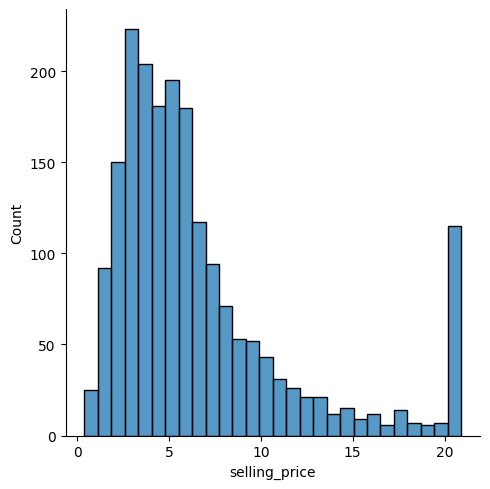

In [45]:
sns.displot(Y_test)

In [46]:
# Residual Analysis
# Error is normally distributed or not
pred = final_model.predict(X_train)

In [47]:
errors = pred - Y_train

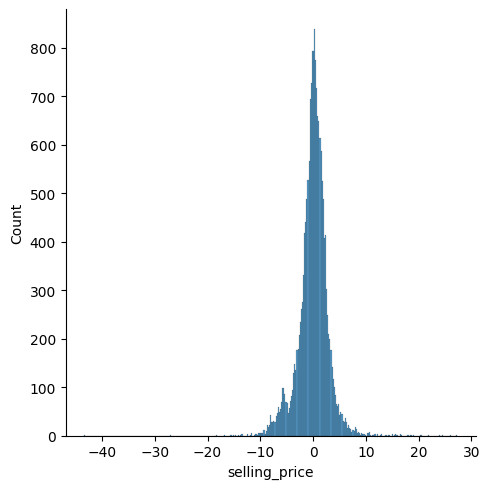

In [48]:
sns.displot(errors)

* Here we can see that we have a partialy normal distributed plot but a bit of left skewed

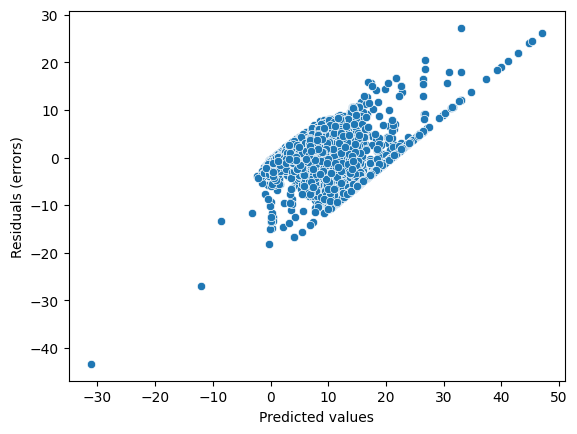

In [ ]:
# Autocorrelation and Heteroscedasticity
# Heteroscedasticity means that the variance of the errors is not constant across all levels of the independent variable(s).
# Autocorrelation means that the errors are correlated with each other.
# plot (predicted values vs Residuals(errors))

sns.scatterplot(x=pred, y=errors)
plt.xlabel("Predicted values")
plt.ylabel("Residuals (errors)")
plt.show()

In [ ]:
new_df = df[df['selling_price']<25]


In [52]:
new_df.shape

(19820, 16)

In [53]:
# There is no chage in data points after removing the outliers. So we will not remove the outliers.

In [54]:
X = new_df[cols3]
Y = new_df['selling_price']

In [56]:
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_8228\4074713945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = sc.fit_transform(X[cols])


In [57]:
X.head()

,km_driven,mileage,engine,max_power,Individual,Electric,Manual
0,1.195828,0.045745,-1.310754,-1.157780,1.248892,-0.020095,0.495818
1,-0.737872,-0.140402,-0.537456,-0.360203,1.248892,-0.020095,0.495818
2,0.035608,-0.582501,-0.537456,-0.404885,1.248892,-0.020095,0.495818
3,-0.409143,0.329620,-0.921213,-0.693085,1.248892,-0.020095,0.495818
4,-0.544502,0.760085,0.042999,0.010435,-0.800710,-0.020095,0.495818


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)    


In [59]:
final = LinearRegression()
final.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
final.score(X_train, Y_train)

0.661927450142042

In [61]:
print("Adjusted R^2 :", 1 - (1-final.score(X_train, Y_train)) * (len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))

Adjusted R^2 : 0.661794723958699


In [63]:
Y_pred = final.predict(X_test)

In [64]:
print("mean_absolute_error:", mean_absolute_error(Y_pred, Y_test))
print("mean_squared_error:", mean_squared_error(Y_pred, Y_test))
print("mean_absolute_percentage_error:", mean_absolute_percentage_error(Y_pred, Y_test))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(Y_pred, Y_test)))

mean_absolute_error: 1.955185898352651
mean_squared_error: 7.606463370303971
mean_absolute_percentage_error: 0.4982011512684131
root_mean_squared_error: 2.7579817567025295


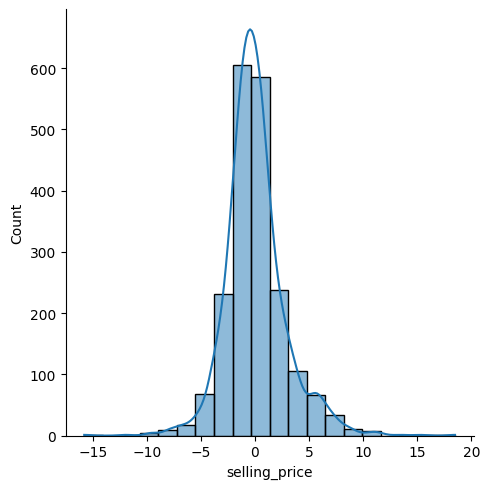

In [66]:
error = Y_test - Y_pred
sns.displot(Y_test - Y_pred, bins=20, kde=True)

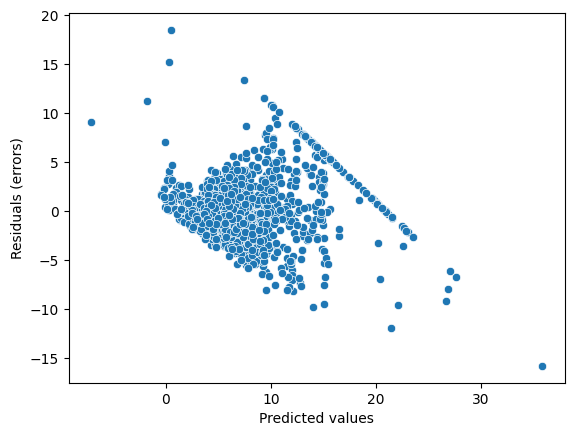

In [67]:
# Prediction vs Residuals
sns.scatterplot(x=Y_pred, y=error)
plt.xlabel("Predicted values")
plt.ylabel("Residuals (errors)")
plt.show()

In [ ]:
# Here in this case we have autocorrelation and heteroscedasticity. So our model is not good enough. We can try with polynomial regression or decision tree regression or random forest regression.